# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **STEP 1: Import the required libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# sklearn Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# **STEP 2: Load the dataset**

In [ ]:
# Connect the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the data into dataframe
df = pd.read_csv('/content/drive/My Drive/Almabetter/Coronavirus Tweet Sentiment Analysis/Coronavirus_Tweets.csv',encoding='latin-1')

# **STEP 3: Data Inspection & Exploratory Data Analysis**

In [ ]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
df.shape

(41157, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [ ]:
# find the null values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

From above observation, We can see that UserName and ScreenName column contains integer data type values and it's just a number. These columns will not be useful for modeling.

We can see location column and Sentiment column in details.

We need to remove special characters and stopwords for modeling.


In [ ]:
# drop the null values
df.dropna(inplace=True)
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
df.shape

(32567, 6)

In [ ]:
# count of Location
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# count of Sentiments
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [ ]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


### **Graphical Representation of Sentiment Column**

Text(0, 0.5, 'count')

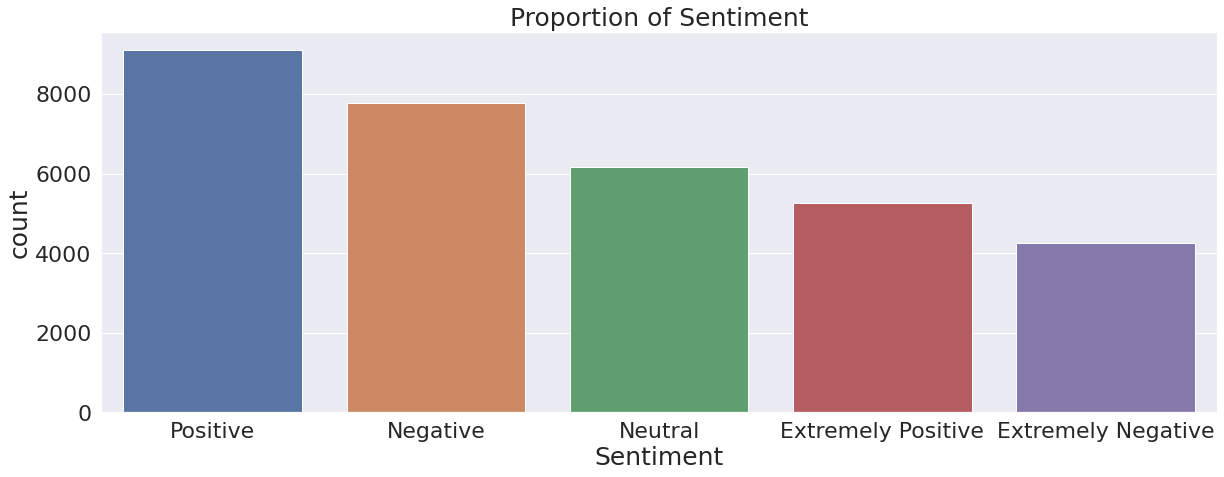

In [ ]:
plt.figure(figsize=(20,7))
sns.set(font_scale = 2)
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=25)
ax.set_xlabel("Sentiment", fontsize=25)
ax.set_ylabel('count', fontsize=25)

From above analysis we can see the higher number of sentiment column is positive column.

In [ ]:
# replacing the extreme values with normal values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [ ]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


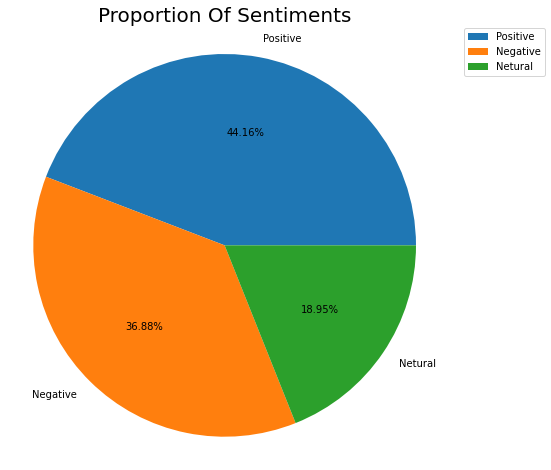

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### **Unique values in each column**

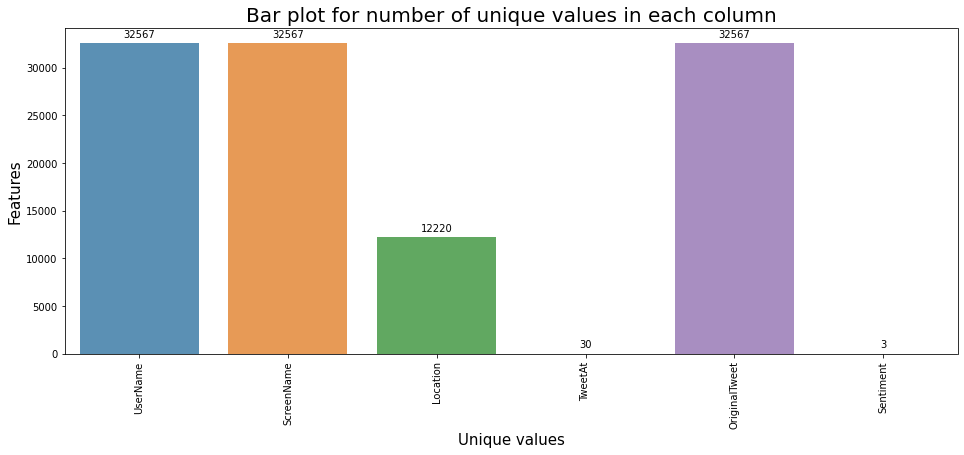

In [ ]:
# finding unique values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique = []
for i in df.columns :
  unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(16,6))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches :
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column', fontsize=20)
plt.xlabel('Unique values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

### **Countplot for original tweet according to TweetAt column**

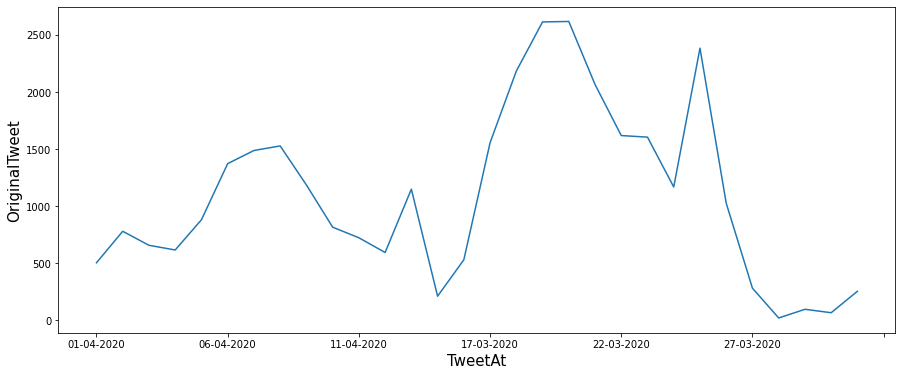

In [ ]:
# plotting original tweet according to "TweetAt" column
plt.figure(figsize=(15,6))
grp_tweet = df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.xlabel('TweetAt', fontsize=15)
plt.ylabel('OriginalTweet', fontsize=15)
plt.show()

### **Top 10 Locations**

In [ ]:
# getting top 10 locations
top10_location = df['Location'].value_counts().sort_values(ascending = False)[:10]
top10_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

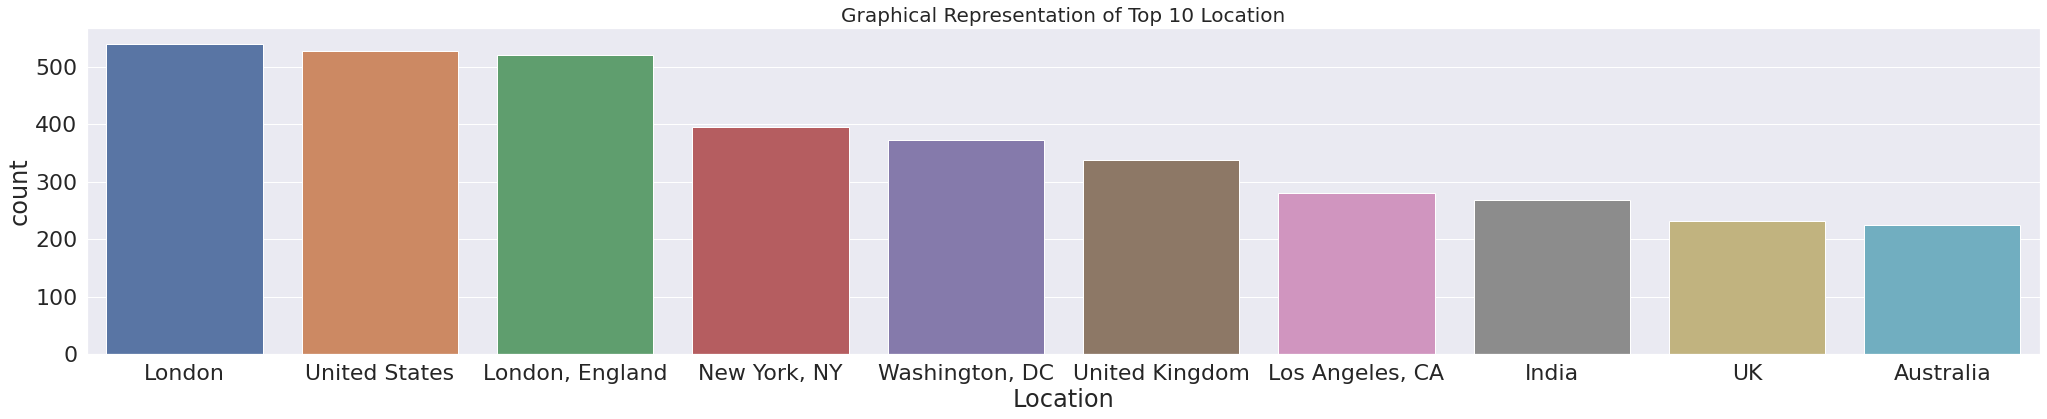

In [ ]:
# plotting top 10 location in graaph
plt.figure(figsize=(35,6))
plt.title('Graphical Representation of Top 10 Location', fontsize = 20)
sns.set(font_scale = 2)
sns.countplot(data = df[df['Location'].isin(top10_location.index)], x='Location', order=top10_location.index)

# **STEP 4: Feature Engineering**

### **Step 4.1: Convert to LowerCase**

In [ ]:
df['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
5        As news of the regionÂs first confirmed COVID...
6        Cashier at grocery store was sharing his insig...
                               ...                        
41147    YÂall really shitting that much more at home?...
41149    Still shocked by the number of #Toronto superm...
41150    I never that weÂd be in a situation &amp; wor...
41152    Airline pilots offering to stock supermarket s...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 32567, dtype: object

In [ ]:
df["OriginalTweet"] = df["OriginalTweet"].str.lower()

In [ ]:
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
5        as news of the regionâs first confirmed covid...
6        cashier at grocery store was sharing his insig...
                               ...                        
41147    yâall really shitting that much more at home?...
41149    still shocked by the number of #toronto superm...
41150    i never that weâd be in a situation &amp; wor...
41152    airline pilots offering to stock supermarket s...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 32567, dtype: object

### **Step 4.2: Remove Punctuations**

In [ ]:
type(df['OriginalTweet'])

pandas.core.series.Series

In [ ]:
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [ ]:
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)

In [ ]:
df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
5        as news of the regionâs first confirmed covid...
6        cashier at grocery store was sharing his insig...
                               ...                        
41147    yâall really shitting that much more at home ...
41149    still shocked by the number of toronto superma...
41150    i never that weâd be in a situation amp world...
41152    airline pilots offering to stock supermarket s...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 32567, dtype: object

In [ ]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,Positive,as news of the region s first confirmed covid...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,Positive,cashier at grocery store was sharing his insig...


In [ ]:
df['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

### **Step 4.3: Remove Stop Words**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df['clean_tweets'][10]

'month hasnt crowding supermarkets restaurants however reducing hours closing malls means everyone using entrance dependent single supermarket manila lockdown covid philippines'

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,Positive,news region first confirmed covid case came su...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insights covid p...


### **STEP 4.4: Most Common words**

In [ ]:
from collections import Counter

In [ ]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [ ]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,coronavirus,14386
2,prices,6194
3,food,5522
4,supermarket,5432
5,store,5314
6,grocery,4882
7,people,4196
8,amp,4065
9,consumer,3718
10,shopping,2870


In [ ]:
import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Most Common Words in tweets')
fig.show()

From above analysis you can see most common used words are coronavirus, prices, food supermarket and store.

### **STEP 4.5: Word Cloud**

In [ ]:
# word cloud
text = " ".join(tweets.split()[0] for tweets in df.OriginalTweet)
word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=800).generate(text)


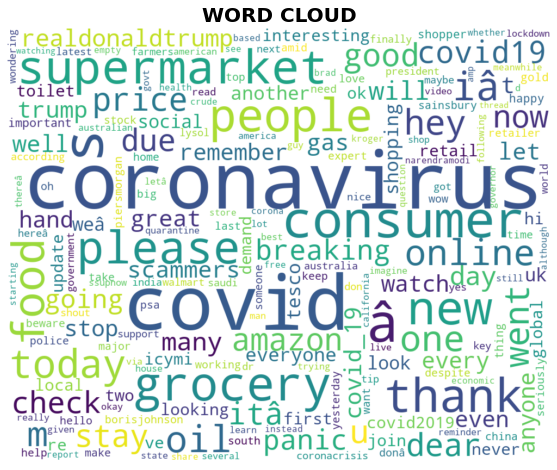

In [ ]:
plt.figure(figsize=(15,8))
plt.title('WORD CLOUD', fontsize=20, weight='bold')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##**EDA Work result**

---

*   Dataset have total 41157 rows and 6 columns.
*   We dropped the null values from location column.
*   "UserName" and "ScreenName" have only integer values. Which does not provide any meaningful information.
*   For modeling,  we required only two columns "OriginalTweet" and "Sentiment".
*   We removed specil characters from original tweets column.
*   After dropping and adding a new column, now we have 7 columns and 32567 rows. 
*   There are five types of sentiments - Extremely Positive, Positive, Extremely Negative, Negative and Neutral.
*   We replaced Extremely positive to positive and Extremely negative to negative column.

*   The graphical representation of top 10 locations shows us that most of the tweets came from London followed by United States.

# **STEP 5: Model Training**

###**Train - Test Split**

In [ ]:
# specify input and output attributes
x = df.clean_tweets
y = df.Sentiment
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [ ]:
tvec = TfidfVectorizer()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24425,), (24425,), (8142,), (8142,))

##**Model 1 - Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
model1 = Pipeline([('vectorizer', tvec), ('classifier', LR)])
model1.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [ ]:
# model prediction
y_pred_LR = model1.predict(x_test)

Text(0, 0.5, 'Predicted')

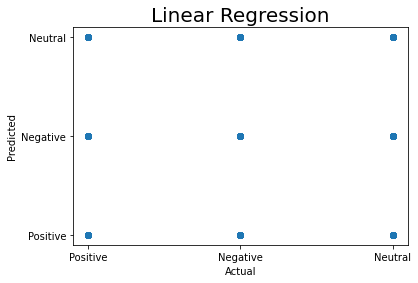

In [ ]:
# scatter plot of Linear Regresssion
plt.scatter(y_test, y_pred_LR)
plt.title('Logistic Regression', fontsize=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')

##**Model 2 - Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
model2 = Pipeline([('vectorizer', tvec), ('classifier', DTC)])
model2.fit(x_train, y_train)

y_pred_DTC = model2.predict(x_test)

Text(0, 0.5, 'Predicted')

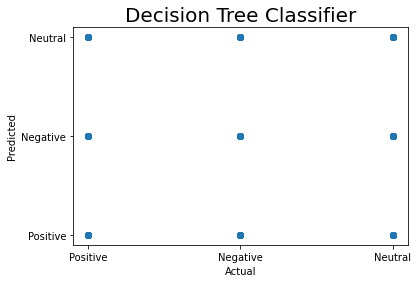

In [ ]:
# scatter plot of Decision Tree Classifier
plt.scatter(y_test, y_pred_DTC)
plt.title('Decision Tree Classifier', fontsize=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')

##**Model 3 - Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
model3 = Pipeline([('vectorizer', tvec), ('classifier', RFC)])
model3.fit(x_train, y_train)

y_pred_RFC = model3.predict(x_test)

Text(0, 0.5, 'Predicted')

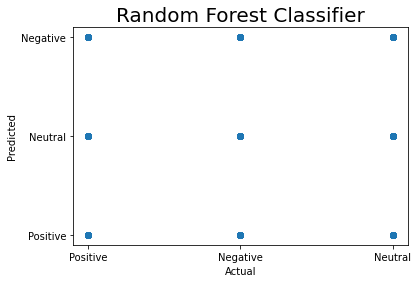

In [ ]:
# scatter plot of Random Forest Classifier
plt.scatter(y_test, y_pred_RFC)
plt.title('Random Forest Classifier', fontsize=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')

##**Model 4 - Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
model4 = Pipeline([('vectorizer', tvec), ('classifier', GBC)])
model4.fit(x_train, y_train)

y_pred_GBC = model4.predict(x_test)

Text(0, 0.5, 'Predicted')

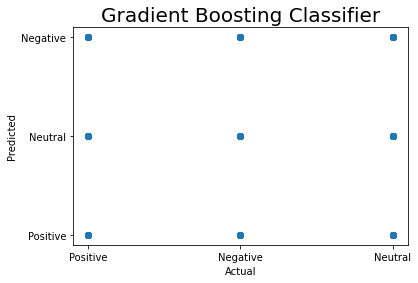

In [ ]:
# scatter plot of Gradient Boosting Classifier
plt.scatter(y_test, y_pred_GBC)
plt.title('Gradient Boosting Classifier', fontsize=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')

#**STEP 6: Performance Metrics and Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

## **Performance**

### **Performance of Logistic Regression Model**

In [ ]:
print('Accuracy : ', accuracy_score(y_pred_LR, y_test))
print('Precision : ', precision_score(y_pred_LR, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_LR, y_test, average = 'weighted'))

Accuracy :  0.7710636207320068
Precision :  0.7857896154337569
Recall :  0.7710636207320068


### **Performance of Decision Tree Classifier**

In [ ]:
print('Accuracy : ', accuracy_score(y_pred_DTC, y_test))
print('Precision : ', precision_score(y_pred_DTC, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_DTC, y_test, average = 'weighted'))

Accuracy :  0.6101694915254238
Precision :  0.6082988270481552
Recall :  0.6101694915254238


### **Performance of Random Forest Classifier**

In [ ]:
print('Accuracy : ', accuracy_score(y_pred_RFC, y_test))
print('Precision : ', precision_score(y_pred_RFC, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_RFC, y_test, average = 'weighted'))

Accuracy :  0.7197248833210513
Precision :  0.7235239741354087
Recall :  0.7197248833210513


### **Performance of Gradient Boosting Classsifier**

In [ ]:
print('Accuracy : ', accuracy_score(y_pred_GBC, y_test))
print('Precision : ', precision_score(y_pred_GBC, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_GBC, y_test, average = 'weighted'))

Accuracy :  0.6546303119626627
Precision :  0.6942037999145646
Recall :  0.6546303119626627


##**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

### **Confusion matrix for Linear Reggression**

[[2444  335  373]
 [ 174  822  157]
 [ 437  388 3012]]


[Text(0, 0.5, 'OriginalTweet'), Text(0, 1.5, 'Sentiment')]

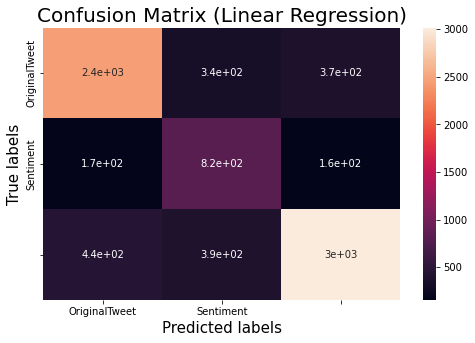

In [ ]:
# Get the confusion matrix for Linear Reggression

y_pred_LR = model1.predict(x_test)

labels = ['OriginalTweet', 'Sentiment']
cm = confusion_matrix(y_pred_LR, y_test)
print(cm)

plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix (Linear Regression)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Confusion matrix for Decision Tree Classifier**

[[1765  362  734]
 [ 523  842  447]
 [ 767  341 2361]]


[Text(0, 0.5, 'OriginalTweet'), Text(0, 1.5, 'Sentiment')]

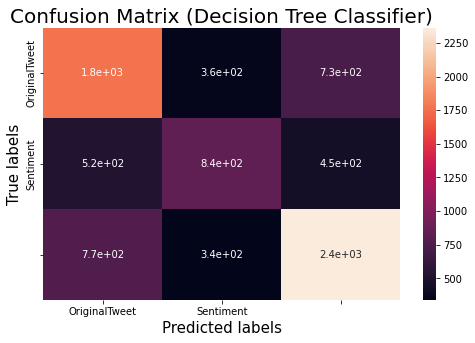

In [ ]:
# Get the confusion matrix for Decision Tree Classifier

y_pred_DTC = model2.predict(x_test)

labels = ['OriginalTweet', 'Sentiment']
cm = confusion_matrix(y_pred_DTC, y_test)
print(cm)

plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree Classifier)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Confusion matrix for Random Forest Classifier**

[[2114  239  468]
 [ 286  944  272]
 [ 655  362 2802]]


[Text(0, 0.5, 'OriginalTweet'), Text(0, 1.5, 'Sentiment')]

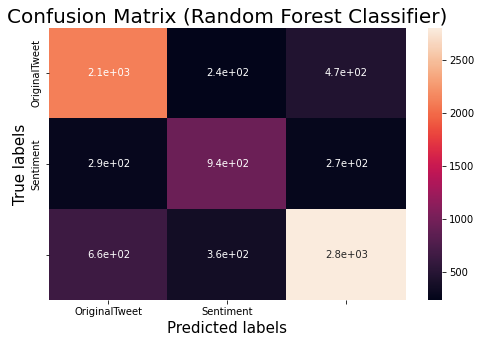

In [ ]:
# Get the confusion matrix for Random Forest Classifier

y_pred_RFC = model3.predict(x_test)

labels = ['OriginalTweet', 'Sentiment']
cm = confusion_matrix(y_pred_RFC, y_test)
print(cm)

plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest Classifier)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Confusion matrix for Gradient Boosting Classifier**

[[1861  206  452]
 [ 229  596  217]
 [ 965  743 2873]]


[Text(0, 0.5, 'OriginalTweet'), Text(0, 1.5, 'Sentiment')]

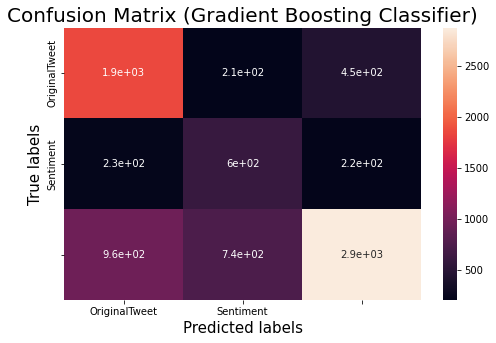

In [ ]:
# Get the confusion matrix for Gradient Boosting Classifier

y_pred_GBC = model4.predict(x_test)

labels = ['OriginalTweet', 'Sentiment']
cm = confusion_matrix(y_pred_GBC, y_test)
print(cm)

plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix (Gradient Boosting Classifier)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **STEP 7: Conclusion**



##**Conclusion**

---
*   Total we used four models here - 
1. Logistic Regression Model

2. Decision Tree Classifier

3. Random Forest Classifier 

4. Gradient Boosting Classifier.


*   We have built models for multiple and binary class classification models,out of four models can see the better accuracy is with Logistic Regression that is 77%.











